## Second set of Forcing Files: SSH

In [1]:
import arrow
import datetime
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [35]:
year = 2017
month = 1
day = 1

In [45]:
single = xr.open_dataset(f'/results/forcing/sshNeahBay/obs/ssh_y{year}m{month:02d}d{day:02d}.nc')
single

<xarray.Dataset>
Dimensions:       (time_counter: 24, xbT: 100, yb: 1)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2017-01-01T01:00:00 ... 2017-...
  * xbT           (xbT) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
  * yb            (yb) int64 0
Data variables:
    nbidta        (yb, xbT) int64 ...
    nbjdta        (yb, xbT) int64 ...
    nbrdta        (yb, xbT) int64 ...
    sossheig      (time_counter, yb, xbT) float64 ...
    vobtcrtx      (time_counter, yb, xbT) float64 ...
    vobtcrty      (time_counter, yb, xbT) float64 ...
Attributes:
    Conventions:  CF-1.6
    title:        Neah Bay SSH hourly values
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       /results/forcing/sshNeahBay/txt/sshNB_2017-01-02_19.txt
    references:   https://bitbucket.org/salishsea/tools/src/tip/SalishSeaNowc...
    history:      Mon Mar 12 08:08:32 2018: ncks -O --mk_rec_dmn time_counter...
    comment:      Observation from Neah Bay storm surge website generated by ...
    NCO:          4.4.2

In [8]:
tsize = single.time_counter.shape[0]
xbTsize = 2*single.xbT.shape[0]
xbTsize

200

In [6]:
def duplicate_copy(single, tsize, xbTsize):
    double = np.zeros((tsize, xbTsize))
    double[:, 0::2] = single[:]
    double[:, 1::2] = single[:]
    return double

In [13]:
def duplicate_index(single, xbTsize):
    double = np.zeros((xbTsize))
    double[0::2] = 2*single[:]
    double[1::2] = double[0::2] + 1
    return double

In [28]:
def duplicate_constant(single, xbTsize, tsize=0):
    if tsize == 0:
        double = np.zeros((xbTsize))
        if single[0] == single[-1]:
            if single[0] != 0:
                double[:] = single[0]
            return double
        else:
            print ("NOT A CONSTANT FIELD")
    else:
        double = np.zeros((tsize, xbTsize))
        if single[0, 0] == single[-1, -1]:
            if single[0, 0] != 0:
                double[:, :] = single[:, 0]
            return double
        else:
            print ("NOT A CONSTANT FIELD")

In [9]:
sossheig = np.expand_dims(duplicate_copy(single.sossheig[:, 0, :], tsize, xbTsize), axis=1)
sossheig.shape

(24, 1, 200)

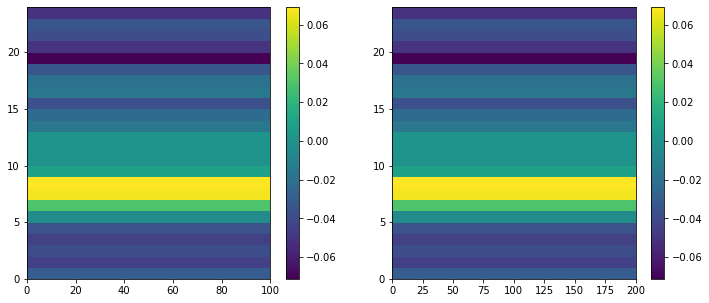

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
colours = axs[0].pcolormesh(single.sossheig[:, 0, :])
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(sossheig[:, 0, :]);
fig.colorbar(colours, ax=axs[1]);

In [12]:
single.nbjdta

<xarray.DataArray 'nbjdta' (yb: 1, xbT: 100)>
array([[371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
        385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398,
        399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412,
        413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
        427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440,
        441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454,
        455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
        469, 470]])
Coordinates:
  * xbT      (xbT) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * yb       (yb) int64 0

In [14]:
nbjdta = np.expand_dims(duplicate_index(single.nbjdta[0, :], xbTsize), axis=0)
nbjdta

array([[742., 743., 744., 745., 746., 747., 748., 749., 750., 751., 752.,
        753., 754., 755., 756., 757., 758., 759., 760., 761., 762., 763.,
        764., 765., 766., 767., 768., 769., 770., 771., 772., 773., 774.,
        775., 776., 777., 778., 779., 780., 781., 782., 783., 784., 785.,
        786., 787., 788., 789., 790., 791., 792., 793., 794., 795., 796.,
        797., 798., 799., 800., 801., 802., 803., 804., 805., 806., 807.,
        808., 809., 810., 811., 812., 813., 814., 815., 816., 817., 818.,
        819., 820., 821., 822., 823., 824., 825., 826., 827., 828., 829.,
        830., 831., 832., 833., 834., 835., 836., 837., 838., 839., 840.,
        841., 842., 843., 844., 845., 846., 847., 848., 849., 850., 851.,
        852., 853., 854., 855., 856., 857., 858., 859., 860., 861., 862.,
        863., 864., 865., 866., 867., 868., 869., 870., 871., 872., 873.,
        874., 875., 876., 877., 878., 879., 880., 881., 882., 883., 884.,
        885., 886., 887., 888., 889., 

In [16]:
single.nbidta

<xarray.DataArray 'nbidta' (yb: 1, xbT: 100)>
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]])
Coordinates:
  * xbT      (xbT) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * yb       (yb) int64 0

In [20]:
nbidta = np.expand_dims(duplicate_constant(single.nbidta[0, :], xbTsize), axis=0)
nbidta.shape

(1, 200)

In [21]:
nbjjdta = np.expand_dims(duplicate_constant(single.nbjdta[0, :], xbTsize), axis=0)

NOT A CONSTANT FIELD


In [40]:
def write_the_file(year, month, day, nbidta, nbjdta, nbrdta, sossheig, vobtcrtx, vobtcrty, xbTsize, single):
    filename = f'ncfiles/ssh/Dssh_y{year}m{month:02d}d{day:02d}.nc'
  # Add some global attributes
    ds_attrs = {
    'acknowledgements':
        'from sshNeahBay/obs',
    'creator_email':
        'sallen@eoas.ubc.ca',
    'creator_name':
        'Salish Sea MEOPAR Project Contributors',
    'creator_url':
        'https://salishsea-meopar-docs.readthedocs.org/',
    'institution':
        'UBC EOAS',
    'institution_fullname': (
        'Earth, Ocean & Atmospheric Sciences,'
        ' University of British Columbia'
    ),
    'summary': (
        'Ssh file, doubled by copying from sshNeahBay'
    ),
    'source': (
        'tools/double_resolution/ssh.ipynb'
    ),
    'history': (
        '[{}] File creation.'
        .format(datetime.datetime.today().strftime('%Y-%m-%d'))
    )
    }  

    da = {}
    interpl = {
        'nbidta': nbidta,
        'nbjdta': nbjdta,
        'nbrdta': nbrdta,
        'sossheig': sossheig,
        'vobtcrtx': vobtcrtx,
        'vobtcrty': vobtcrty
    }
    for var in interpl.keys():
        if 'dta' in var:
            dims = ('yb', 'xbT')
            coords = {'yb': [0], 'xbT': np.arange(xbTsize)}
        else:
            dims = ('time_counter', 'yb', 'xbT')
            coords = {'time_counter': single.time_counter, 'yb': [0], 'xbT': np.arange(xbTsize)}
        attrs = single[var].attrs

        da[var] = xr.DataArray(
            data=interpl[var],
            name=var,
            dims=dims,
            coords=coords,
            attrs=attrs
        )
    ds = xr.Dataset(
    data_vars=da,
    coords=coords,
    attrs=ds_attrs
    )
    encoding = {var: {'zlib': True} for var in ds.data_vars}
    ds.to_netcdf(
    path=filename,
    unlimited_dims=('time_counter'),
    encoding=encoding,
    )

In [29]:
tsize

24

In [30]:
nbrdta = np.expand_dims(duplicate_constant(single.nbrdta[0, :], xbTsize), axis=0)
vobtcrtx = np.expand_dims(duplicate_constant(single.vobtcrtx[:, 0, :], xbTsize, tsize), axis=1)
vobtcrty = np.expand_dims(duplicate_constant(single.vobtcrty[:, 0, :], xbTsize, tsize), axis=1)

In [32]:
vobtcrty.shape

(24, 1, 200)

In [41]:
write_the_file(year, month, day, nbidta, nbjdta, nbrdta, sossheig, vobtcrtx, vobtcrty, xbTsize, single)

In [51]:
checkit = xr.open_dataset('ncfiles/ssh/Dssh_y2017m01d01.nc')
checkit.close()

## Now do the Looping over a Year

In [53]:
year = 2017
smonth = 1
emonth = 12
startdate = arrow.get(year, smonth, 1)
enddate = arrow.get(year, emonth, 31)
print (startdate, enddate)

2017-01-01T00:00:00+00:00 2017-12-31T00:00:00+00:00


In [54]:
for day in arrow.Arrow.range('day', startdate, enddate):
    singlefile = f'/results/forcing/sshNeahBay/obs/ssh_y{day.year}m{day.month:02d}d{day.day:02d}.nc'
    single = xr.open_dataset(singlefile)
    
    tsize = single.time_counter.shape[0]
    xbTsize = 2*single.xbT.shape[0]
    
    nbidta = np.expand_dims(duplicate_constant(single.nbidta[0, :], xbTsize), axis=0)
    nbjdta = np.expand_dims(duplicate_index(single.nbjdta[0, :], xbTsize), axis=0)
    nbrdta = np.expand_dims(duplicate_constant(single.nbrdta[0, :], xbTsize), axis=0)
    sossheig = np.expand_dims(duplicate_copy(single.sossheig[:, 0, :], tsize, xbTsize), axis=1)
    vobtcrtx = np.expand_dims(duplicate_constant(single.vobtcrtx[:, 0, :], xbTsize, tsize), axis=1)
    vobtcrty = np.expand_dims(duplicate_constant(single.vobtcrty[:, 0, :], xbTsize, tsize), axis=1)

    
    write_the_file(day.year, day.month, day.day, nbidta, nbjdta, nbrdta, sossheig, vobtcrtx, vobtcrty, xbTsize, single)
    single.close()

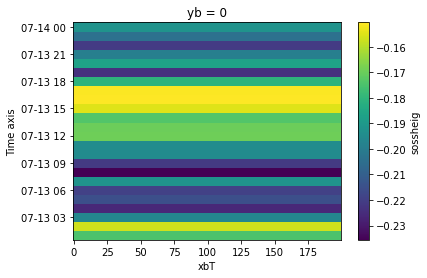

In [57]:
checkit = xr.open_dataset('ncfiles/ssh/Dssh_y2017m07d13.nc')
checkit.sossheig[:, 0].plot();

In [58]:
checkit.close()